# FTP

In [1]:
_FTP_ = 225
_PATH_ = '/home/caster/training_data'

# Load dependencies

In [5]:
%run -i training_functions.py

In [12]:
t_data = read_intervals(_PATH_, _FTP_)

t_data[:10].drop(['watts_std', 'watts_25', 'watts_50', 'watts_75', 'watts_max', 'temp', 'hr_max'], axis=1)


2013_08_24_08_23_25.utf8.json
2013_11_22_15_55_32.utf8.json
2013_08_29_07_44_47.utf8.json
2016_12_11_15_15_03.utf8.json
2013_10_07_18_14_08.utf8.json
2013_09_15_11_02_23.utf8.json
2015_07_07_07_15_29.utf8.json


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in double_scalars


2013_02_03_10_08_17.utf8.json
2017_06_11_18_21_40.utf8.json
2013_11_09_13_37_41.utf8.json
2013_12_08_09_38_51.utf8.json
2016_02_27_20_52_36.utf8.json
2014_01_01_20_03_56.utf8.json
2017_02_22_17_33_49.utf8.json
2013_12_22_14_03_19.utf8.json
2015_11_24_13_53_31.utf8.json


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in double_scalars


2014_02_02_16_50_52.utf8.json
2013_10_20_10_01_58.utf8.json
2015_04_17_17_56_02.utf8.json
2015_04_28_19_13_56.utf8.json
2017_07_15_10_25_36.utf8.json
2015_03_01_17_48_09.utf8.json
2015_06_14_13_35_29.utf8.json
2015_05_09_11_06_10.utf8.json
2015_11_21_09_28_11.utf8.json
2013_12_16_15_12_53.utf8.json
2013_09_10_19_05_41.utf8.json
2014_03_01_19_26_49.utf8.json
2015_04_08_12_52_45.utf8.json
2015_10_04_11_23_12.utf8.json
2015_06_04_18_43_54.utf8.json
2013_06_11_18_43_37.utf8.json
2013_06_14_20_04_26.utf8.json
2013_02_05_20_36_09.utf8.json
2015_12_12_16_31_04.utf8.json
2013_03_23_11_59_10.utf8.json
2016_01_23_16_06_13.utf8.json
2013_07_12_08_25_04.utf8.json
2017_07_25_10_54_42.utf8.json
2013_10_19_10_44_32.utf8.json
2015_07_06_07_29_41.utf8.json
2013_04_10_18_52_16.utf8.json
2013_09_24_19_25_31.utf8.json
2015_05_25_19_33_03.utf8.json
2013_09_22_18_51_03.utf8.json
2015_10_12_12_36_50.utf8.json
2016_04_09_18_37_58.utf8.json
2016_04_26_19_04_28.utf8.json
2016_08_15_20_31_01.utf8.json
2014_04_19

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:59: RuntimeWarning: divide by zero encountered in double_scalars


2016_11_17_12_30_56.utf8.json
2013_01_01_18_39_26.utf8.json
2016_04_23_09_23_39.utf8.json
2014_02_04_19_48_44.utf8.json
2014_03_22_08_56_57.utf8.json
2013_07_02_07_29_13.utf8.json
2016_07_17_09_47_39.utf8.json
2013_04_21_17_22_14.utf8.json
2015_12_08_14_33_05.utf8.json
2013_05_12_10_29_32.utf8.json
2015_05_15_10_24_01.utf8.json
2013_10_12_09_15_17.utf8.json
2013_10_08_18_51_04.utf8.json
2013_09_06_07_35_01.utf8.json
2013_02_07_19_18_48.utf8.json
2016_04_28_19_11_10.utf8.json
2013_04_23_18_34_55.utf8.json
2014_03_08_10_46_13.utf8.json
2016_09_12_19_36_23.utf8.json
2017_07_08_18_42_11.utf8.json
2017_06_30_18_56_06.utf8.json
2015_05_02_10_59_30.utf8.json
2013_09_04_07_50_33.utf8.json
2013_12_26_13_59_18.utf8.json
2013_08_15_08_50_32.utf8.json
2014_01_12_10_00_08.utf8.json
2013_09_21_09_42_08.utf8.json
2013_06_16_18_26_03.utf8.json
2014_02_20_07_55_11.utf8.json
2016_08_28_20_16_09.utf8.json
2015_09_13_12_34_56.utf8.json
2013_07_21_07_52_08.utf8.json
2013_01_26_13_51_44.utf8.json
2015_04_25

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:98: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:99: RuntimeWarning: invalid value encountered in double_scalars


2016_09_24_16_27_56.utf8.json
2013_11_16_11_57_56.utf8.json
2016_10_01_18_16_55.utf8.json
2013_05_26_17_16_14.utf8.json
2016_04_20_19_08_38.utf8.json
2013_03_06_17_14_57.utf8.json
2013_06_15_12_18_23.utf8.json
2017_06_15_20_04_02.utf8.json
2013_12_06_10_06_06.utf8.json
2017_02_18_11_13_04.utf8.json
2013_01_02_21_37_10.utf8.json
2015_06_29_07_31_01.utf8.json
2014_04_07_19_40_25.utf8.json
2013_12_21_12_32_45.utf8.json
2013_08_03_10_14_08.utf8.json
2015_08_05_20_06_23.utf8.json
2013_06_27_17_56_19.utf8.json
2014_03_19_14_07_37.utf8.json
2015_08_12_17_24_31.utf8.json
2013_02_16_17_13_39.utf8.json
2016_09_28_18_13_45.utf8.json
2015_08_04_20_38_05.utf8.json
2016_07_08_17_42_50.utf8.json
2015_02_15_15_07_11.utf8.json
2015_04_20_19_10_43.utf8.json
2015_01_14_20_17_27.utf8.json
2015_01_28_13_56_50.utf8.json
2016_10_05_13_11_52.utf8.json
2015_07_01_07_30_13.utf8.json
2017_08_01_12_12_47.utf8.json
2013_08_27_08_18_41.utf8.json
2016_04_06_14_06_49.utf8.json
2015_05_16_19_36_26.utf8.json
2015_07_20

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:62: RuntimeWarning: invalid value encountered in double_scalars


2016_05_15_11_25_42.utf8.json
2013_03_31_13_29_46.utf8.json
2017_07_20_08_47_22.utf8.json
2014_02_18_07_08_11.utf8.json
2015_11_19_14_06_23.utf8.json
2015_05_17_20_27_36.utf8.json
2016_08_09_17_27_13.utf8.json
2015_03_10_18_45_35.utf8.json
2015_07_31_08_18_55.utf8.json
2013_02_26_20_26_48.utf8.json
2013_08_13_07_20_25.utf8.json
2015_07_19_11_01_15.utf8.json
2015_05_24_18_00_43.utf8.json
2016_04_16_19_57_04.utf8.json
2014_04_29_20_05_59.utf8.json
2013_04_14_18_17_56.utf8.json
2013_11_21_14_24_15.utf8.json
2013_02_20_22_05_18.utf8.json
2013_01_26_09_25_00.utf8.json
2016_10_03_19_36_26.utf8.json
2013_01_22_20_44_02.utf8.json
2013_11_19_14_21_23.utf8.json
2016_11_21_15_50_43.utf8.json
2017_03_25_18_28_52.utf8.json
2013_10_22_18_14_52.utf8.json
2015_03_06_16_38_53.utf8.json
2016_03_05_16_50_38.utf8.json
2016_07_20_20_19_42.utf8.json
2014_01_14_17_08_36.utf8.json
2017_04_13_17_51_40.utf8.json
2015_03_03_17_28_27.utf8.json
2017_03_07_17_47_18.utf8.json
2013_07_04_07_32_21.utf8.json
2017_08_02

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in double_scalars


2014_02_22_09_59_40.utf8.json
2013_05_11_17_51_10.utf8.json
2014_03_16_09_29_40.utf8.json
2013_01_11_15_57_20.utf8.json
2015_01_17_16_08_46.utf8.json
2014_04_15_19_15_40.utf8.json
2015_06_17_19_44_37.utf8.json
2013_08_23_16_43_17.utf8.json
2013_10_09_18_50_19.utf8.json
2015_04_09_20_15_54.utf8.json
2013_05_02_16_57_15.utf8.json
2013_03_06_12_12_09.utf8.json
2013_12_07_12_21_44.utf8.json
2016_11_12_11_36_22.utf8.json
2013_04_02_18_43_59.utf8.json
2013_03_18_09_26_05.utf8.json
2017_06_09_07_27_28.utf8.json
2013_04_24_20_39_39.utf8.json
2013_07_12_17_22_56.utf8.json
2013_04_26_18_38_31.utf8.json
2013_08_24_11_27_37.utf8.json
2017_07_02_19_50_23.utf8.json
2014_01_05_09_09_56.utf8.json
2013_03_27_16_40_04.utf8.json
2013_10_16_19_29_46.utf8.json
2014_02_05_20_14_51.utf8.json
2013_07_31_19_02_53.utf8.json
2015_07_25_09_27_39.utf8.json
2013_07_09_07_33_17.utf8.json
2016_12_03_15_41_05.utf8.json
2017_07_09_18_30_19.utf8.json
2016_08_25_19_52_04.utf8.json
2015_10_29_20_00_43.utf8.json
2015_10_06

,filename,epoch_day,time,cad,hr,hr_min,hr_drift,km,kph,kilojoules,watts,np,alt,vi,tss,if,training_type
0,2013_01_01_18_39_26.utf8.json,15706,13,NaN,104.809297,84,NaN,NaN,NaN,NaN,NaN,NaN,12.689,NaN,NaN,NaN,NA
0,2013_01_02_21_37_10.utf8.json,15707,11,82.519553,NaN,NaN,NaN,6.0847,30.526665,106.7605,149.106844,168.886707,278.597,1.132656,13.761139,0.750608,Endurance
0,2013_01_04_16_37_03.utf8.json,15709,110,68.104255,138.144765,103,0.134058,47.8464,25.989198,902.0300,136.093844,240.768415,863.622,1.769135,196.181671,1.070082,Endurance
0,2013_01_06_19_58_20.utf8.json,15711,61,77.129385,122.411090,88,-0.197576,30.3666,29.457635,513.6505,138.599703,152.256538,46.154,1.098534,68.797399,0.676696,Endurance
0,2013_01_08_19_35_47.utf8.json,15713,22,83.405405,134.048048,86,-0.082893,11.7186,31.640976,226.4965,170.042417,188.220713,17.637,1.106904,30.673005,0.836537,Tempo
0,2013_01_08_19_35_47.utf8.json,15713,5,81.936877,134.152824,126,-0.039035,14.3293,31.224809,48.3310,160.568106,162.761494,3.765,1.013660,6.028203,0.723384,Endurance
0,2013_01_08_19_35_47.utf8.json,15713,33,84.909024,128.890781,103,0.037279,30.5299,28.725840,310.4585,153.086046,156.708599,24.494,1.023664,38.306546,0.696483,Endurance
0,2013_01_11_15_57_20.utf8.json,15716,50,68.918543,135.582616,110,0.291348,21.3516,25.454828,423.9000,140.364238,258.161261,153.42,1.839224,95.615282,1.147383,Endurance
0,2013_01_13_09_52_52.utf8.json,15718,21,71.151694,146.812451,51,-0.500216,12.6168,35.799214,192.1215,151.395981,260.029263,368.334,1.717544,40.448996,1.155686,Endurance
0,2013_01_13_09_52_52.utf8.json,15718,5,84.337662,186.269481,173,0.152313,14.9142,26.853148,94.5500,306.980519,333.920910,68.394,1.087759,12.367441,1.484093,Anaerobic


# Show plot with current data

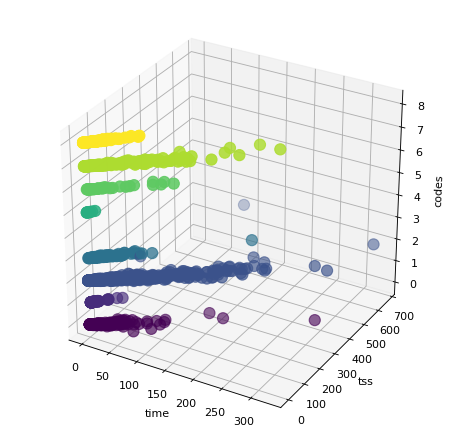

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

x_label = 'time'
y_label = 'tss'
z_label = 'codes'

clean = t_data.drop(['filename', 'temp'], axis=1)

codes = pd.Categorical(clean.training_type)
cath = pd.DataFrame({"codes": codes.codes})

clean.reset_index(drop=True, inplace=True)
cath.reset_index(drop=True, inplace=True)
clean = pd.concat([clean, cath], axis=1)

clean = clean[(clean[x_label] != np.nan) & (clean[y_label] != np.nan) & (clean[z_label] != np.nan)]

x = clean[x_label]
y = clean[y_label]
z = clean[z_label]

fig = plt.figure(figsize=(7, 7), dpi=80)

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)


sc = StandardScaler()
ax.scatter(x, y, z, c=clean.codes, s=100)

plt.show()

# Reset data
# clean = pd.concat([clean.drop(['training_type'], axis=1), pd.get_dummies(clean.training_type)], axis=1)

# Clean dataset to use just the needed features

In [100]:
clean

,epoch_day,time,cad,hr,hr_min,hr_max,hr_drift,km,kph,kilojoules,...,watts_25,watts_50,watts_75,np,alt,vi,tss,if,training_type,codes
0,15706,13,NaN,104.809297,84,113,NaN,NaN,NaN,NaN,...,0,0,0,NaN,12.689,NaN,NaN,NaN,NA,4
1,15707,11,82.519553,NaN,NaN,NaN,NaN,6.08470,30.526665,106.7605,...,132,141,160,168.886707,278.597,1.132656,13.761139,0.750608,Endurance,2
2,15709,110,68.104255,138.144765,103,178,0.134058,47.84640,25.989198,902.0300,...,60,136,194,240.768415,863.622,1.769135,196.181671,1.070082,Endurance,2
3,15711,61,77.129385,122.411090,88,156,-0.197576,30.36660,29.457635,513.6505,...,121,151,164,152.256538,46.154,1.098534,68.797399,0.676696,Endurance,2
4,15713,22,83.405405,134.048048,86,166,-0.082893,11.71860,31.640976,226.4965,...,149,156,175,188.220713,17.637,1.106904,30.673005,0.836537,Tempo,7
5,15713,5,81.936877,134.152824,126,144,-0.039035,14.32930,31.224809,48.3310,...,150,156,170,162.761494,3.765,1.013660,6.028203,0.723384,Endurance,2
6,15713,33,84.909024,128.890781,103,143,0.037279,30.52990,28.725840,310.4585,...,143,157,166,156.708599,24.494,1.023664,38.306546,0.696483,Endurance,2
7,15716,50,68.918543,135.582616,110,180,0.291348,21.35160,25.454828,423.9000,...,66,150,201,258.161261,153.42,1.839224,95.615282,1.147383,Endurance,2
8,15718,21,71.151694,146.812451,51,181,-0.500216,12.61680,35.799214,192.1215,...,33,137,249,260.029263,368.334,1.717544,40.448996,1.155686,Endurance,2
9,15718,5,84.337662,186.269481,173,191,0.152313,14.91420,26.853148,94.5500,...,258.75,313.5,353,333.920910,68.394,1.087759,12.367441,1.484093,Anaerobic,1


In [102]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = shuffle(clean, random_state=7)
data = data[data.epoch_day > 14516]
data = data[['kilojoules', 'time', 'codes']]
data.dropna(inplace=True)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
classify = pdf(scaler.fit_transform(data[['kilojoules','time']]))
classify = classify.rename(columns={0:'kilojoules', 1:'time'})

# # Split into training and test
x_train, x_test = train_test_split(classify, train_size=0.8)
y_train, y_test = train_test_split(data.codes, train_size=0.8)
classify

,kilojoules,time
0,0.014268,0.012232
1,0.307308,0.290520
2,0.019918,0.021407
3,0.059804,0.064220
4,0.038300,0.024465
5,0.053311,0.042813
6,0.008882,0.009174
7,0.017221,0.009174
8,0.084822,0.051988
9,0.036309,0.030581


# Classify using Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=1000)

clf = clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)

print("Score: %f%%" % (score.mean()*100))

Score: 26.421405%


# Classify using Knn

Score 27.424749% (uniform)
Score 24.080268% (distance)


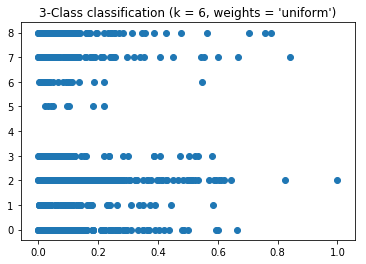

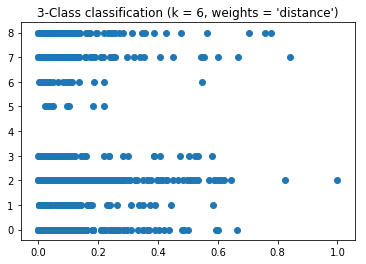

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 6

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x_train, y_train)
    
    # Plot
    plt.figure()

    # Plot also the training points
    plt.scatter(x_train.kilojoules, y_train)
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    print("Score %f%% (%s)" % (clf.score(x_test, y_test).mean()*100, weights))

plt.show()

# Classify using SVM

In [91]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)  

score = clf.score(x_test, y_test)

print("Score: %f%%" % (score.mean()*100))

Score: 38.461538%
